In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [139]:
dataset = pd.read_csv("match france-angleterre.csv",sep=';',header = 0,encoding='latin-1')  


In [162]:
X=dataset.iloc[:,3].values
Y=dataset.iloc[:,[10,12]].values

Z=dataset.iloc[:,1].values

A=dataset.iloc[:,16].values
B=dataset.iloc[:,10].values




In [141]:
print(f'Y contient {Y.shape[0]} positions de joueurs et {Y.shape[1]} variables X et Y')
print(f'il y a {np.unique(A).size} joueurs qui ont participé au match')
X

Y contient 1109 positions de joueurs et 2 variables X et Y
il y a 2 joueurs qui ont participé au match


array(['Billy Vunipola', 'Billy Vunipola', 'Ben Youngs', ..., 'Ben Earl',
       'Anthony Watson', 'Anthony Watson'], dtype=object)

In [142]:
dataset.head()

,Colonne1,PlayerId,StatEvent,PlayerName,StatId,StatName,GameMinutes,GameSeconds,VidRef,X,...,DistCum,RuckNb,OrigineRuck,Cote,Ruck.largeur,Ruck.longueur,Ruck.Next,sensRuck,DureeSeqPen,OffDef
0,1,75,NaN,Billy Vunipola,10007,Receipts,NaN,4,367,162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,75,NaN,Billy Vunipola,10504,Ruck,NaN,7,442,161,...,NaN,1.0,Start,NaN,NaN,NaN,Kick,NaN,NaN,NaN
2,3,314,NaN,Ben Youngs,10007,Receipts,NaN,15,651,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,314,NaN,Ben Youngs,47,Kick,NaN,16,673,149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,832,NaN,Brice Dulin,10007,Receipts,NaN,20,780,413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
#supprime les colonnes du dataset
dataset.drop(['StatEvent'],axis=1 )

,Colonne1,PlayerId,PlayerName,StatId,StatName,GameMinutes,GameSeconds,VidRef,X,nX,...,DistCum,RuckNb,OrigineRuck,Cote,Ruck.largeur,Ruck.longueur,Ruck.Next,sensRuck,DureeSeqPen,OffDef
0,1,75,Billy Vunipola,10007,Receipts,NaN,4,367,162,162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,75,Billy Vunipola,10504,Ruck,NaN,7,442,161,161,...,NaN,1.0,Start,NaN,NaN,NaN,Kick,NaN,NaN,NaN
2,3,314,Ben Youngs,10007,Receipts,NaN,15,651,153,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,314,Ben Youngs,47,Kick,NaN,16,673,149,149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,832,Brice Dulin,10007,Receipts,NaN,20,780,413,587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1105,35976,Tom Curry,10504,Ruck,NaN,4788,152756,769,231,...,NaN,1.0,Turnover Con,NaN,NaN,NaN,Passe,NaN,NaN,NaN
1105,1106,36151,Ben Earl,10007,Receipts,NaN,4795,152948,780,220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,1107,36151,Ben Earl,15,Passe,NaN,4796,152958,782,218,...,"10,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,1108,38,Anthony Watson,10007,Receipts,NaN,4797,152979,826,174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
#graphique du nombre d'actions differentes dans le match
dataset['StatName'].value_counts()

Receipts              537
Passe                 277
Ruck                  159
Kick                   62
Turnover Con           23
Faute off              14
Line Break             12
Turnover Won            9
Faute def               6
Pen Shot                5
Try                     4
Kick touche direct      1
Name: StatName, dtype: int64

<AxesSubplot:>

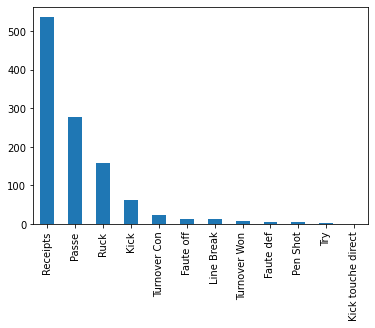

In [145]:
#graphique du nombre d'actions differentes dans le match
dataset['StatName'].value_counts().plot.bar()
#dataset['StatId'].value_counts().plot.bar()

In [146]:
#permet d'obtenir une moyenne de chaque colonne sur les critères désirés
dataset.groupby(['TeamId','PlayerName']).mean()

Colonne1  PlayerId  StatEvent        StatId  \
TeamId PlayerName                                                           
1114   Anthony Watson       514.384615      38.0        NaN   7048.384615   
       Ben Earl            1033.600000   36151.0        NaN   9159.900000   
       Ben Youngs           537.143617     314.0        NaN   5068.952128   
       Billy Vunipola       528.714286      75.0        NaN   8521.166667   
       Charlie Ewels        327.600000    3340.0        NaN   8141.133333   
       Dan Robson          1077.500000     101.0        NaN   5027.000000   
       Elliot Daly          958.090909     346.0        NaN   7419.636364   
       Ellis Genge         1043.500000   13530.0        NaN  10255.500000   
       George Ford          586.935897      33.0        NaN   5277.679487   
       Henry Slade          446.583333     183.0        NaN   6328.166667   
       Jamie George        1033.166667      71.0        NaN   8507.333333   
       Jonny May            606.294118     330.0        NaN   8391.500000   
       Kyle Sinckler        494.850000     304.0        NaN   8659.100000   
       Luke Cowan-Dickie    521.052632     468.0        NaN   9665.789474   
       Mako Vunipola        512.850000      86.0        NaN   8635.750000   
       Mark Wilson          521.666667      19.0        NaN   7952.222222   
       Maro Itoje           718.769231     513.0        NaN   7051.000000   
       Max Malins           519.290323   33963.0        NaN   7867.387097   
       Ollie Lawrence      1046.500000   41277.0        NaN  10255.500000   
       Owen Farrell         473.651163      79.0        NaN   4909.000000   
       Tom Curry            597.857143   35976.0        NaN   8402.857143   
       Will Stuart         1061.000000   33772.0        NaN  10255.500000   
1116   Antoine Dupont       513.086614    4059.0        NaN   5380.055118   
       Brice Dulin          601.052632     832.0        NaN   6391.982456   
       Cameron Woki        1084.000000   37187.0        NaN     15.000000   
       Camille Chat        1087.500000    6767.0        NaN   5011.000000   
       Charles Ollivon      552.533333     526.0        NaN   8176.666667   
       Cyril Baille         403.700000     750.0        NaN   6585.900000   
       Cyril Cazeaux        841.000000    5099.0        NaN     36.000000   
       Damian Penaud        630.933333    6765.0        NaN   5381.133333   
       Dorian Aldegheri    1068.000000    1088.0        NaN  10022.000000   
       Dylan Cretin         492.250000   35968.0        NaN   5969.166667   
       Gael Fickou          563.333333     769.0        NaN   6471.944444   
       Gregory Alldritt     633.815789   41370.0        NaN   7786.842105   
       Jean-Baptiste Gros  1089.500000   41599.0        NaN  10255.500000   
       Julien Marchand      525.846154    1086.0        NaN   7856.230769   
       Matthieu Jalibert    556.888889   38098.0        NaN   5261.539683   
       Mohamed Haouas       461.533333   39074.0        NaN  10207.800000   
       Paul Willemse        457.833333    3155.0        NaN  10175.166667   
       Romain Taofifenua    378.466667     546.0        NaN   6779.666667   
       Teddy Thomas         480.909091     880.0        NaN   6919.772727   
       Virimi Vakatawa      481.736842   20954.0        NaN   7510.578947   

                           GameMinutes  GameSeconds         VidRef  \
TeamId PlayerName                                                    
1114   Anthony Watson              NaN  2021.538462   60780.384615   
       Ben Earl                    NaN  4428.700000  141552.200000   
       Ben Youngs                  NaN  2101.196809   65132.468085   
       Billy Vunipola              NaN  2022.904762   65006.666667   
       Charlie Ewels               NaN  1165.733333   35173.000000   
       Dan Robson                  NaN  4669.500000  149794.500000   
       Elliot Daly                 NaN  4118.818182  132213.272727   
       Elli

In [203]:
#dataset[dataset['TeamId']== 1116]['PlayerName'].hist()
dataset[dataset['TeamId']== 1116]['PlayerName'].value_counts()

Antoine Dupont        127
Matthieu Jalibert      63
Brice Dulin            57
Gregory Alldritt       38
Gael Fickou            36
Teddy Thomas           22
Cyril Baille           20
Virimi Vakatawa        19
Romain Taofifenua      15
Charles Ollivon        15
Mohamed Haouas         15
Damian Penaud          15
Julien Marchand        13
Dylan Cretin           12
Paul Willemse           6
Jean-Baptiste Gros      2
Camille Chat            2
Cameron Woki            1
Cyril Cazeaux           1
Dorian Aldegheri        1
Name: PlayerName, dtype: int64

In [205]:
values,counts = np.unique(X,return_counts=True)

In [213]:
for i,j in zip (values[counts.argsort()],counts[counts.argsort()]):
    print(f'le joueur {i} apparait {j}')

le joueur Dorian Aldegheri apparait 1
le joueur Cyril Cazeaux apparait 1
le joueur Cameron Woki apparait 1
le joueur Jean-Baptiste Gros apparait 2
le joueur Dan Robson apparait 2
le joueur Ollie Lawrence apparait 2
le joueur Camille Chat apparait 2
le joueur Ellis Genge apparait 4
le joueur Will Stuart apparait 4
le joueur Paul Willemse apparait 6
le joueur Jamie George apparait 6
le joueur Mark Wilson apparait 9
le joueur Ben Earl apparait 10
le joueur Elliot Daly apparait 11
le joueur Dylan Cretin apparait 12
le joueur Julien Marchand apparait 13
le joueur Maro Itoje apparait 13
le joueur Charlie Ewels apparait 15
le joueur Mohamed Haouas apparait 15
le joueur Romain Taofifenua apparait 15
le joueur Damian Penaud apparait 15
le joueur Charles Ollivon apparait 15
le joueur Luke Cowan-Dickie apparait 19
le joueur Virimi Vakatawa apparait 19
le joueur Cyril Baille apparait 20
le joueur Kyle Sinckler apparait 20
le joueur Mako Vunipola apparait 20
le joueur Teddy Thomas apparait 22
le jo

In [148]:
#selectionne les joueurs ayant commis une faute (offensive ou défensive)
dataset[dataset['StatId']== 10022]['PlayerName'].value_counts()

Mako Vunipola        3
Mohamed Haouas       2
Luke Cowan-Dickie    2
Ben Earl             2
Max Malins           2
Kyle Sinckler        1
Charles Ollivon      1
Henry Slade          1
Julien Marchand      1
Maro Itoje           1
Dylan Cretin         1
Paul Willemse        1
Romain Taofifenua    1
Dorian Aldegheri     1
Name: PlayerName, dtype: int64

In [149]:
#Renvoi le nombre de joueur ayant commis une faute offensive et le nombre de joueur ayant commis une faute défensive 
dataset[dataset['StatId']== 10022]['StatName'].value_counts()

Faute off    14
Faute def     6
Name: StatName, dtype: int64

In [150]:
#Retourne le nom des 6 premières actions avec les joueurs correspondants
dataset.loc[0:5,['StatName','PlayerName','TeamId']]

,StatName,PlayerName,TeamId
0,Receipts,Billy Vunipola,1114
1,Ruck,Billy Vunipola,1114
2,Receipts,Ben Youngs,1114
3,Kick,Ben Youngs,1114
4,Receipts,Brice Dulin,1116
5,Ruck,Brice Dulin,1116


Text(0, 0.5, 'position en largeur')

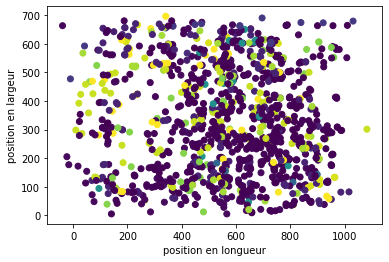

In [151]:
# Matplotlib graphiques
categories = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # Supervised
dataset[dataset['TeamId']== 1116]
plt.scatter(Y[:,0],Y[:,1],c=Z)

plt.xlabel('position en longueur')
plt.ylabel('position en largeur')

Text(0, 0.5, 'position en largeur')

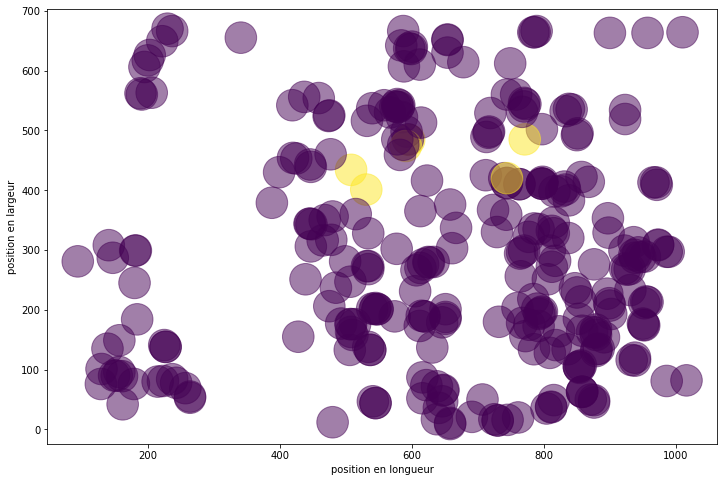

In [176]:
#Position des joueurs sur le terrain

masque_dataset=dataset['PlayerId']==769
filtre_joueur = dataset[masque_dataset]
plt.figure(figsize=(12, 8))
plt.scatter(Y[:300,0],Y[:300,1],c=masque_dataset[:300],alpha=0.5, s=1000)



plt.xlabel('position en longueur')
plt.ylabel('position en largeur')


n = Y.shape[1]
plt.figure(figsize=(12, 8))
for i in range(n):
    plt.subplot(n//2, n//2, i+1)
    plt.scatter(Y[:, 0], Y[:, i], c=A)
    plt.xlabel('0')
    plt.ylabel(i)
    plt.colorbar(ticks=list(np.unique(Z)))
plt.show()

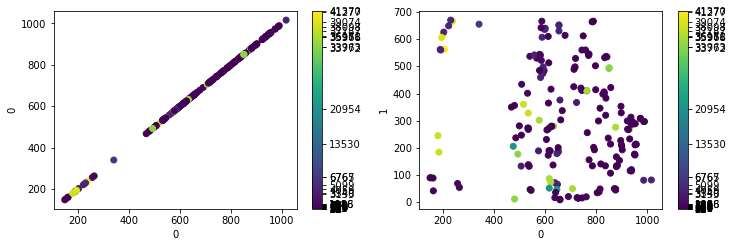

In [235]:
n = Y.shape[1]
plt.figure(figsize=(12, 8))
for i in range(n):
    plt.subplot(n//1, n//1, i+1)
    plt.scatter(Y[:200, 0], Y[:200, i], c=Z[:200])
    plt.xlabel('0')
    plt.ylabel(i)
    plt.colorbar(ticks=list(np.unique(Z)))
plt.show()

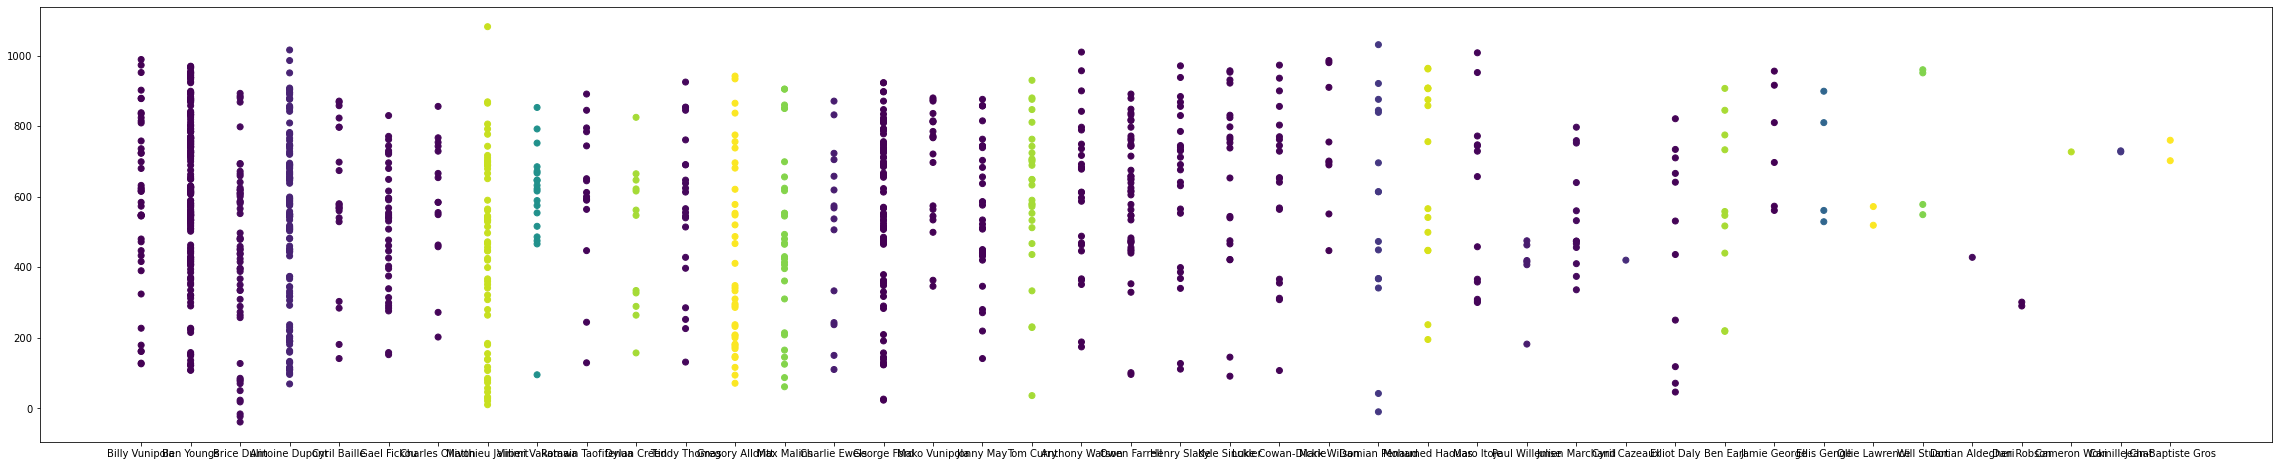

In [236]:
n = Y.shape[1]
plt.figure(figsize=(40, 8))
plt.scatter(X,B,c=Z)

(array([ 24.,  80.,  64.,  98., 154., 225., 191., 154., 106.,  13.]),
 array([ -39. ,   73.1,  185.2,  297.3,  409.4,  521.5,  633.6,  745.7,
         857.8,  969.9, 1082. ]),
 <BarContainer object of 10 artists>)

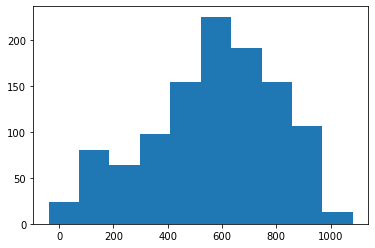

In [158]:
#repartition du nombre d'actions sur le terrain en longueur 
plt.hist(Y[:,0])

In [179]:
#Z.index[Z['PlayerId'] == 769].tolist()


masque_dataset=dataset['PlayerId']==769
filtre_joueur = dataset[masque_dataset]

print(filtre_joueur)


#v = np.random.randn(10)
#print(v)
#index_of_joueur = np.where(v == 769)

      Colonne1  PlayerId  StatEvent   PlayerName  StatId      StatName  \
12          13       769        NaN  Gael Fickou   10007      Receipts   
13          14       769        NaN  Gael Fickou   10504          Ruck   
26          27       769        NaN  Gael Fickou   10007      Receipts   
27          28       769        NaN  Gael Fickou   10504          Ruck   
297        298       769        NaN  Gael Fickou   10007      Receipts   
298        299       769        NaN  Gael Fickou      15         Passe   
387        388       769        NaN  Gael Fickou   10007      Receipts   
388        389       769        NaN  Gael Fickou   10504          Ruck   
403        404       769        NaN  Gael Fickou   10007      Receipts   
404        405       769        NaN  Gael Fickou      47          Kick   
429        430       769        NaN  Gael Fickou   10007      Receipts   
430        431       769        NaN  Gael Fickou   10504          Ruck   
485        486       769        NaN  G

In [182]:
import numpy as np
F=np.array([[Y]])
F

array([[[[162,  42],
         [161,  89],
         [153,  90],
         ...,
         [218, 522],
         [174, 625],
         [188, 680]]]], dtype=int64)

In [183]:
F.mean()

447.892696122633

In [196]:
G=np.array([Z])
G

array([[   75,    75,   314, ..., 36151,    38,    38]], dtype=int64)

In [232]:
angle_passe = dataset.iloc[:,38].values
angle_passe

array([nan, nan, nan, ..., '112,0044642', nan, nan], dtype=object)

In [233]:
C=np.array([angle_passe]).where(Z == 769)
np.nanmean(angle_passe)

AttributeError: 'numpy.ndarray' object has no attribute 'where'

In [229]:
C=np.where(Z == 769)
C

(array([  12,   13,   26,   27,  297,  298,  387,  388,  403,  404,  429,
         430,  485,  486,  504,  555,  556,  561,  562,  590,  591,  641,
         651,  714,  715,  744,  745,  781,  782,  828,  829,  830,  897,
         898, 1092, 1093], dtype=int64),)